In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [12]:
#Load Data
data = pd.read_csv("/Users/ashutosh/datasets/BostonHousing/Boston.csv")

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [14]:
data.shape

(506, 14)

In [17]:
data.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [18]:
data.dtypes

CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object

In [19]:
## Correlation between numeric attributes
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


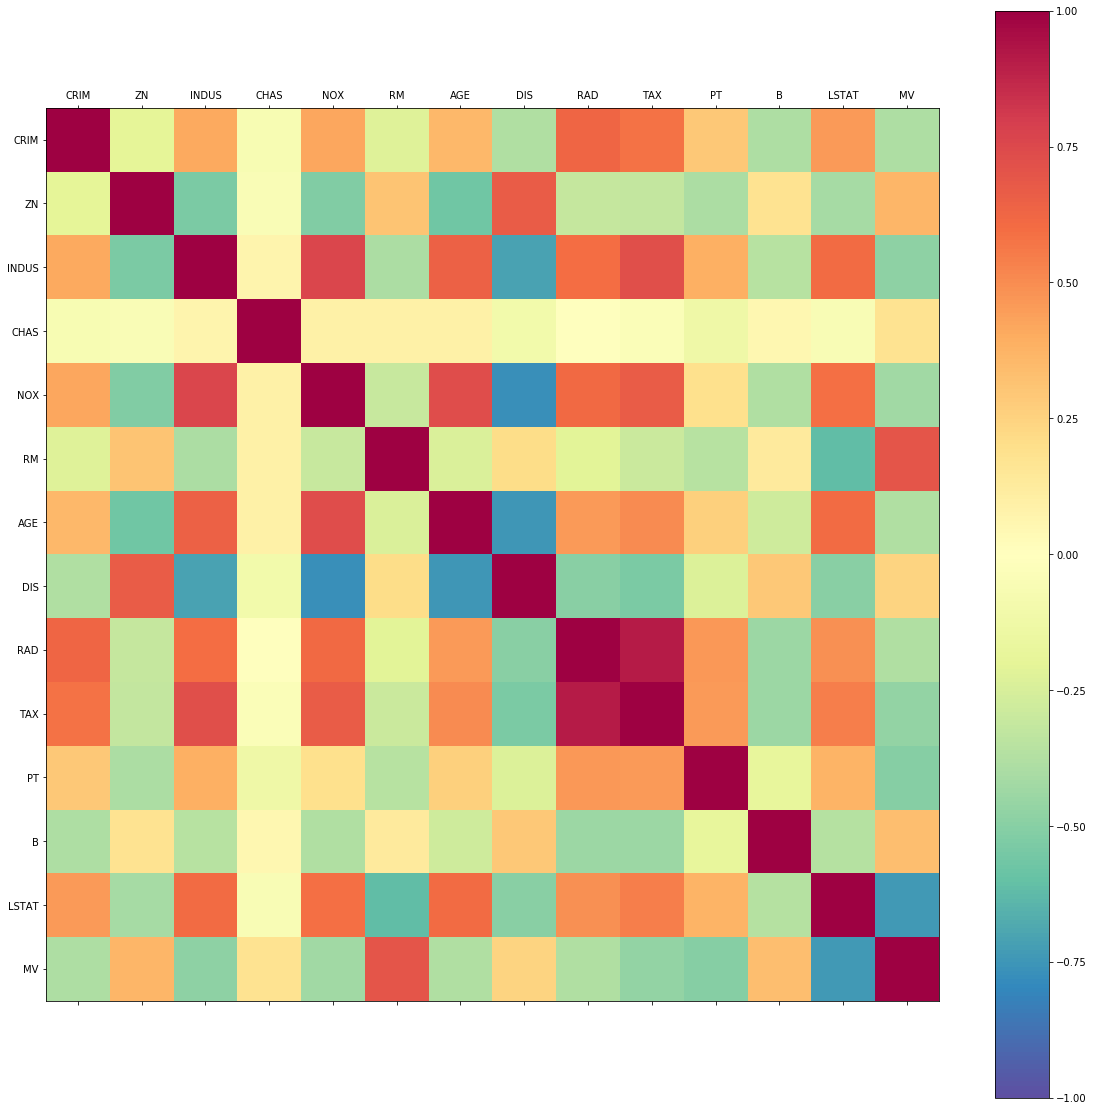

In [20]:
##plot correlation matrix
figure = plt.figure(figsize=(20,20))
plot = figure.add_subplot(111)
corr_col = plot.matshow(data.corr(method='pearson'),vmin=-1, vmax=1, interpolation='none', cmap = plt.cm.Spectral_r)
figure.colorbar(corr_col)
columns= data.columns

ticks = np.arange(0,14,1)
plot.set_xticks(ticks)
plot.set_yticks(ticks)
plot.set_xticklabels(columns)
plot.set_yticklabels(columns)
plt.show()


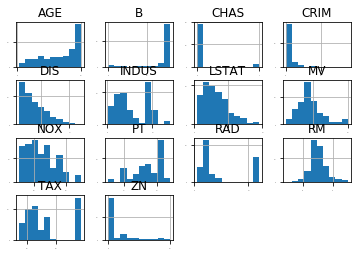

In [22]:
#Univariate histogram of all
figure = plt.figure(figsize=(20,20))
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

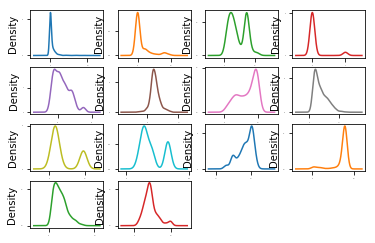

In [23]:
# density
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
plt.show()

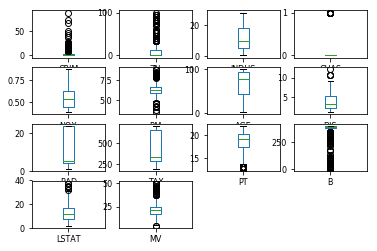

In [24]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()

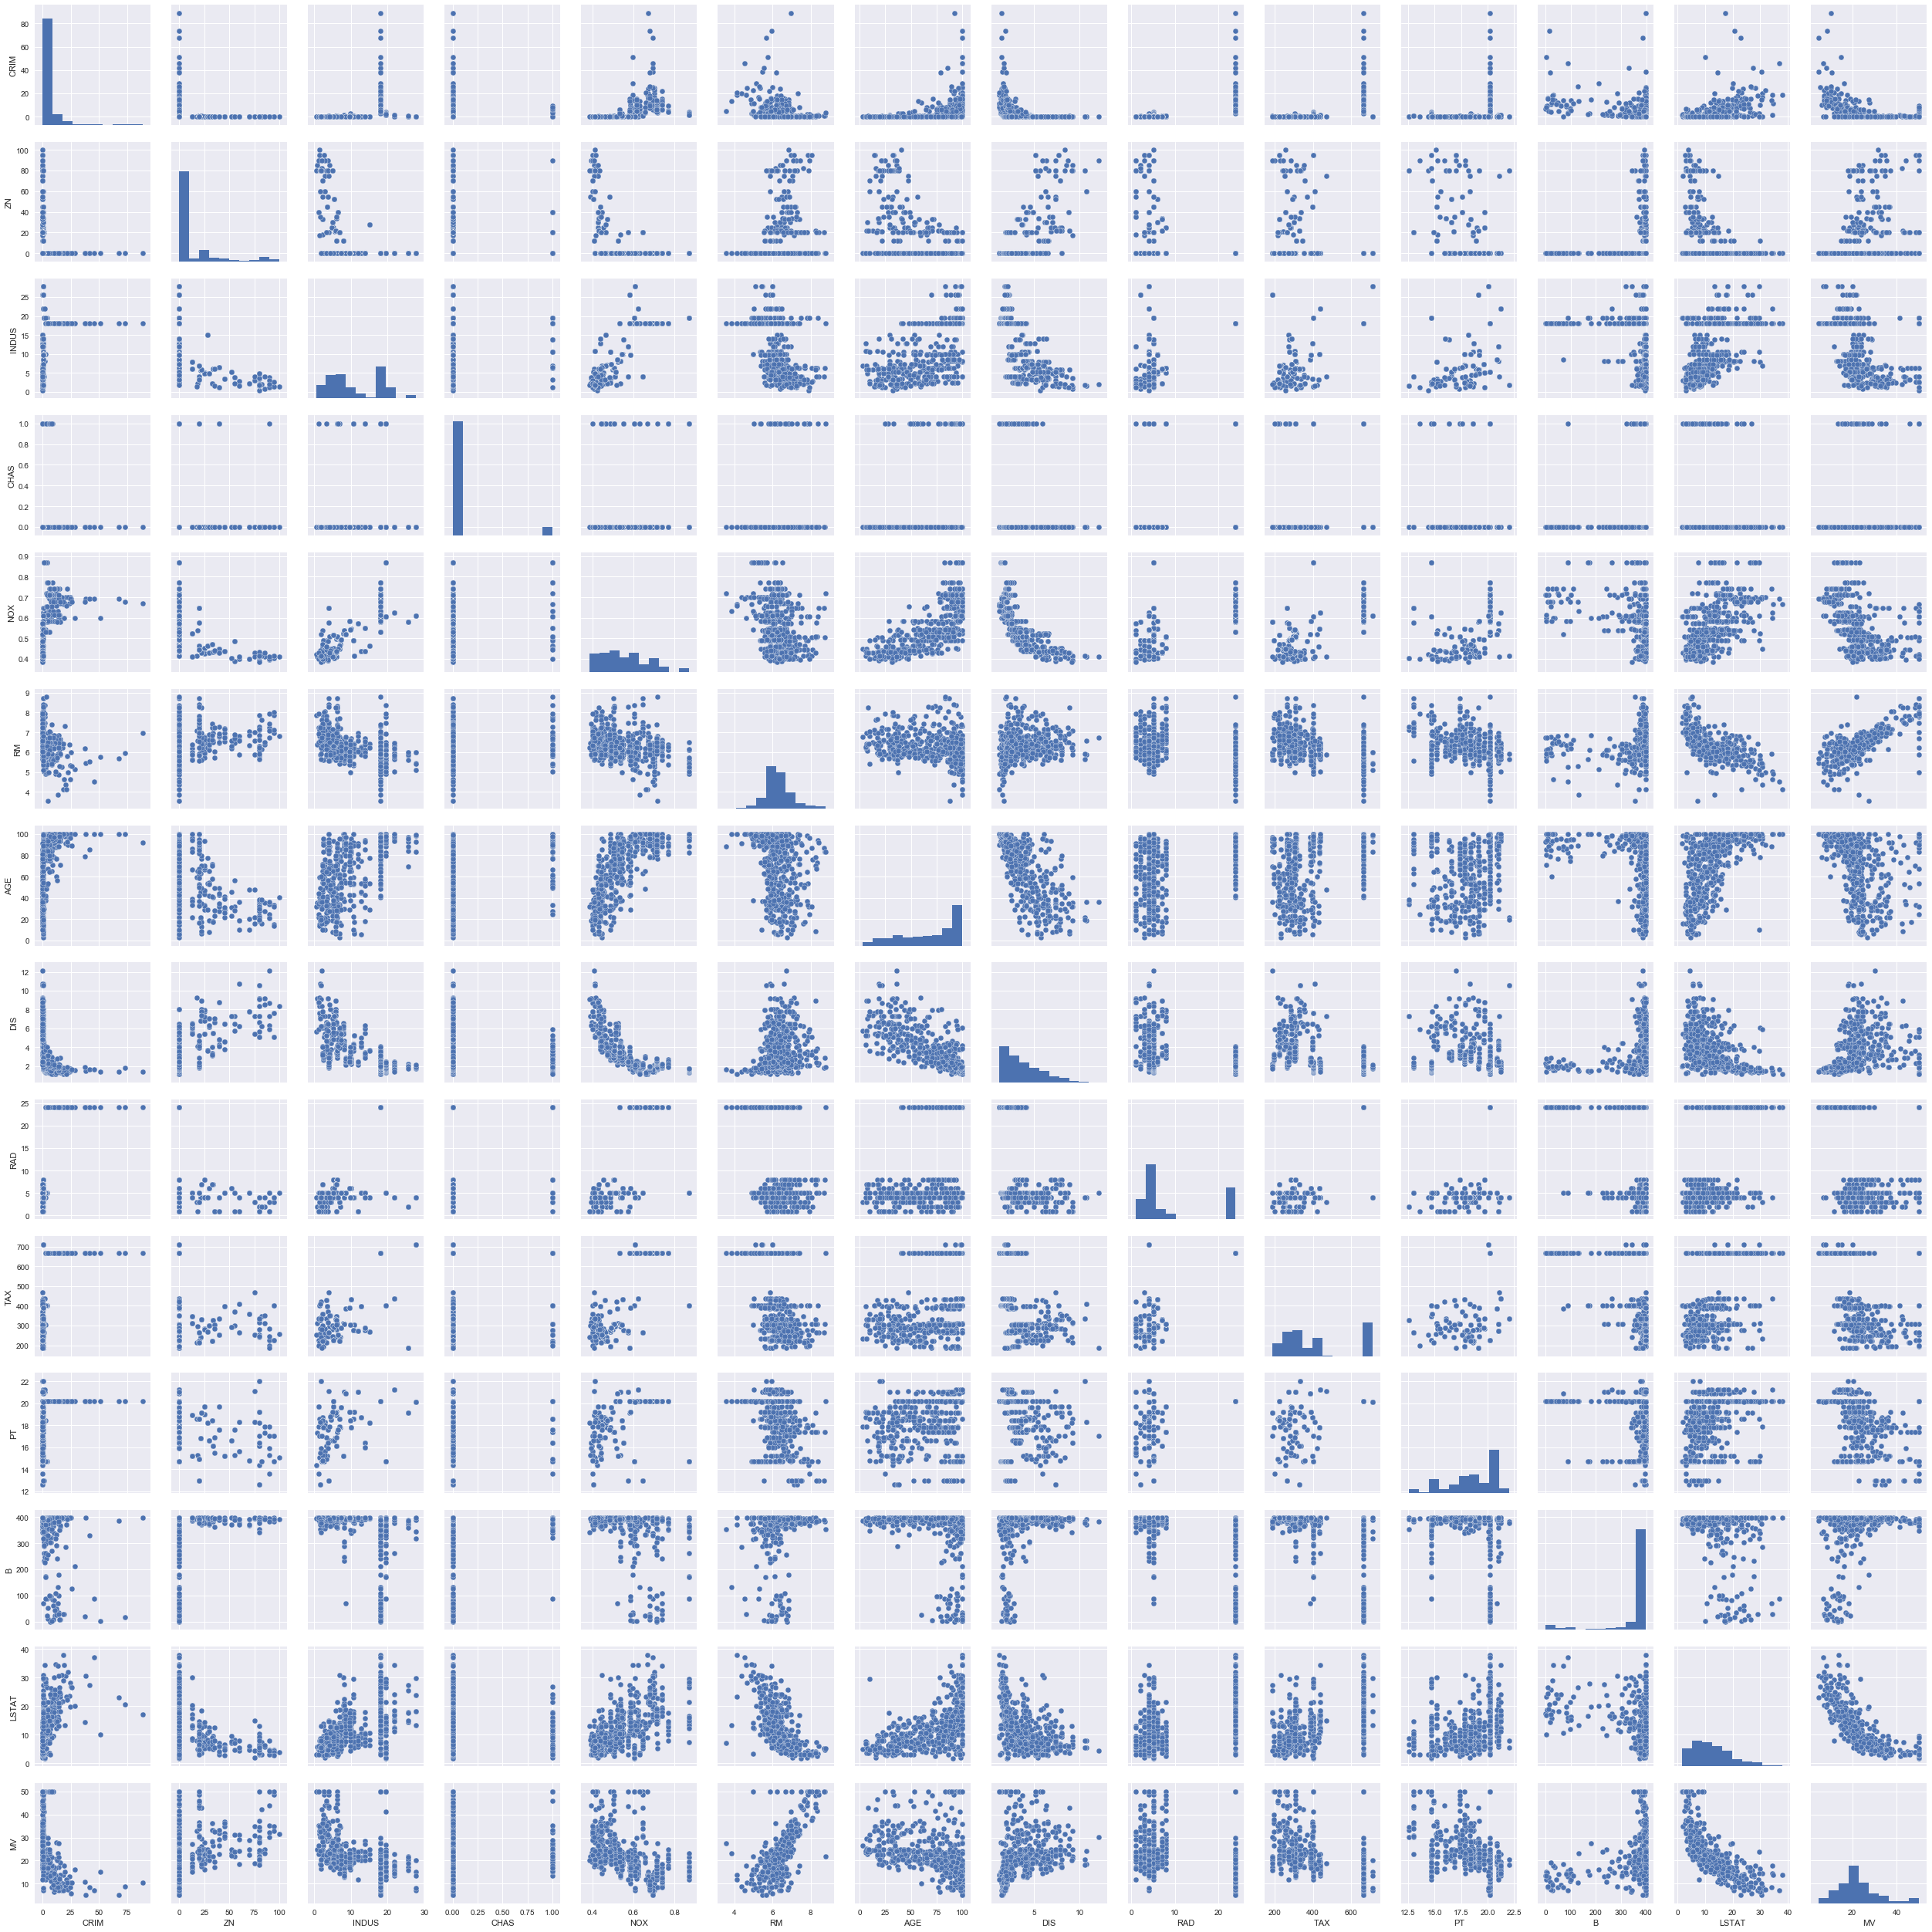

In [25]:
#Pairplot
import seaborn as sns
sns.pairplot(data)

In [27]:
##  Validation Set Hold Out
array = data.values
X=array[:,0:13]
Y=array[:,13]
val_size=0.2
seed =1221
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=val_size, random_state=seed)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### Baseline Algorithm

In [28]:
#Test options and evaluation Metrics
num_folds=10
seed=7
scoring = 'neg_mean_squared_error'

In [29]:
## Spot Checking Algorithms
#Linear: LinearReg, Lasso and ElasticNet
#NonLinear: CART, SVR, KNN

models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))



In [38]:
## Running all algos and comparing the results
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -24.536927 (12.093230)
LASSO: -28.340047 (12.372564)
EN: -28.386278 (11.951612)
KNN: -42.703103 (11.563578)
CART: -22.445224 (11.291151)
SVR: -87.531072 (27.901155)


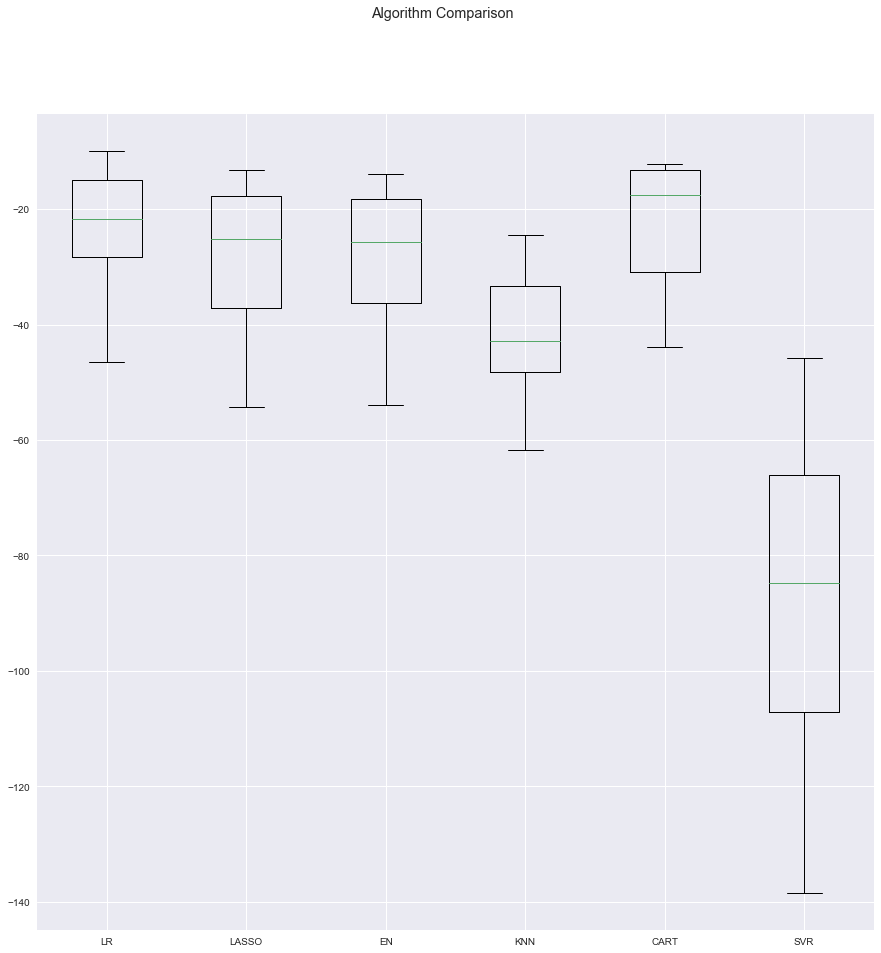

In [39]:
# Compare Algorithms
fig = plt.figure(figsize=(15,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Data Standardisation

In [42]:
#Standardizing the data and pipelines
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))



In [44]:
results=[]
names=[]
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -24.536927 (12.093230)
ScaledLasso: -29.285195 (15.087400)
ScaledEN: -31.318968 (16.520774)
ScaledKNN: -21.836660 (15.575026)
ScaledCART: -25.221992 (13.570016)
ScaledSVR: -31.555119 (19.508152)


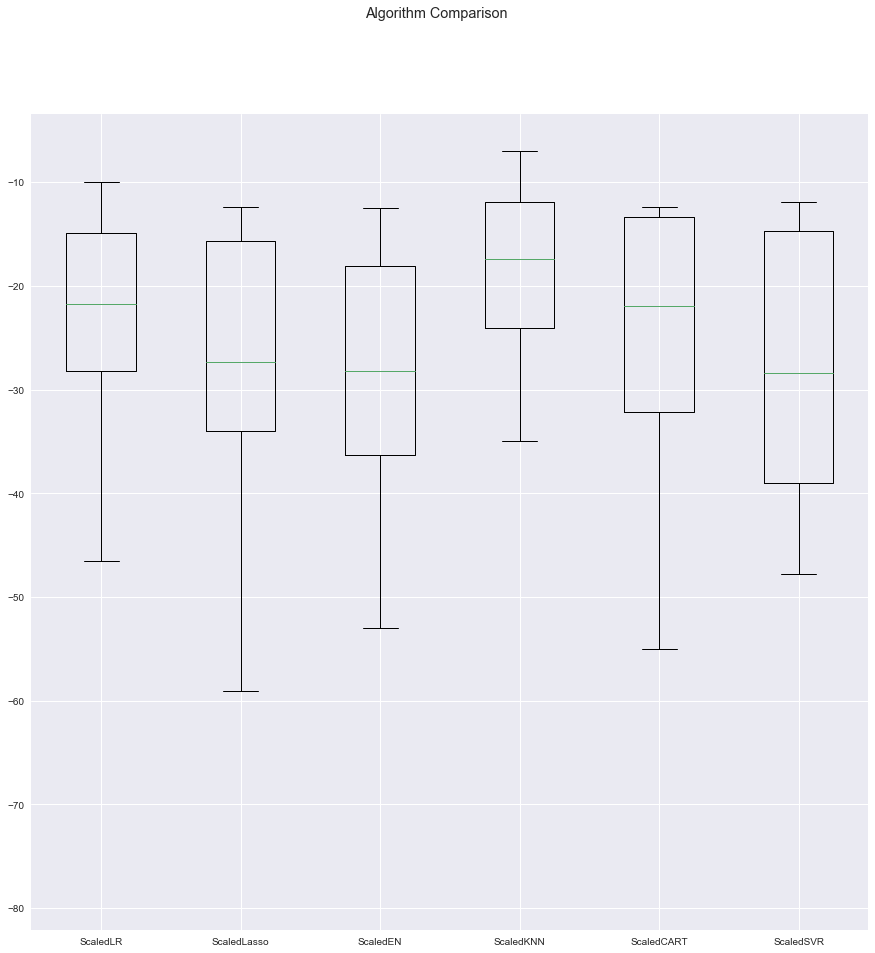

In [45]:
# Compare Algorithms
fig = plt.figure(figsize=(15,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Improving results with tuning

In [46]:
## KNN Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors = k_values)

In [47]:
model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.912748 using {'n_neighbors': 1}
-19.912748 (14.139687) with: {'n_neighbors': 1}
-22.007269 (16.142371) with: {'n_neighbors': 3}
-21.787588 (15.657109) with: {'n_neighbors': 5}
-22.366695 (15.715767) with: {'n_neighbors': 7}
-22.949492 (15.795687) with: {'n_neighbors': 9}
-23.909334 (16.016321) with: {'n_neighbors': 11}
-23.872941 (15.346433) with: {'n_neighbors': 13}
-24.288136 (15.392743) with: {'n_neighbors': 15}
-25.320411 (16.017879) with: {'n_neighbors': 17}
-26.327023 (16.093305) with: {'n_neighbors': 19}
-26.823361 (16.565711) with: {'n_neighbors': 21}


### Ensemble Models

In [ ]:
# Using Boosting Models: ADABoost and Gradient Boost
# Using Bagging Models: RandomForest and ExtraTrees


In [51]:
#ensemble
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))

In [52]:
results = []
names=[]
for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state= seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.787393 (8.458660)
ScaledGBM: -11.253987 (7.833507)
ScaledRF: -13.018651 (9.280081)
ScaledAB: -11.886254 (6.782265)


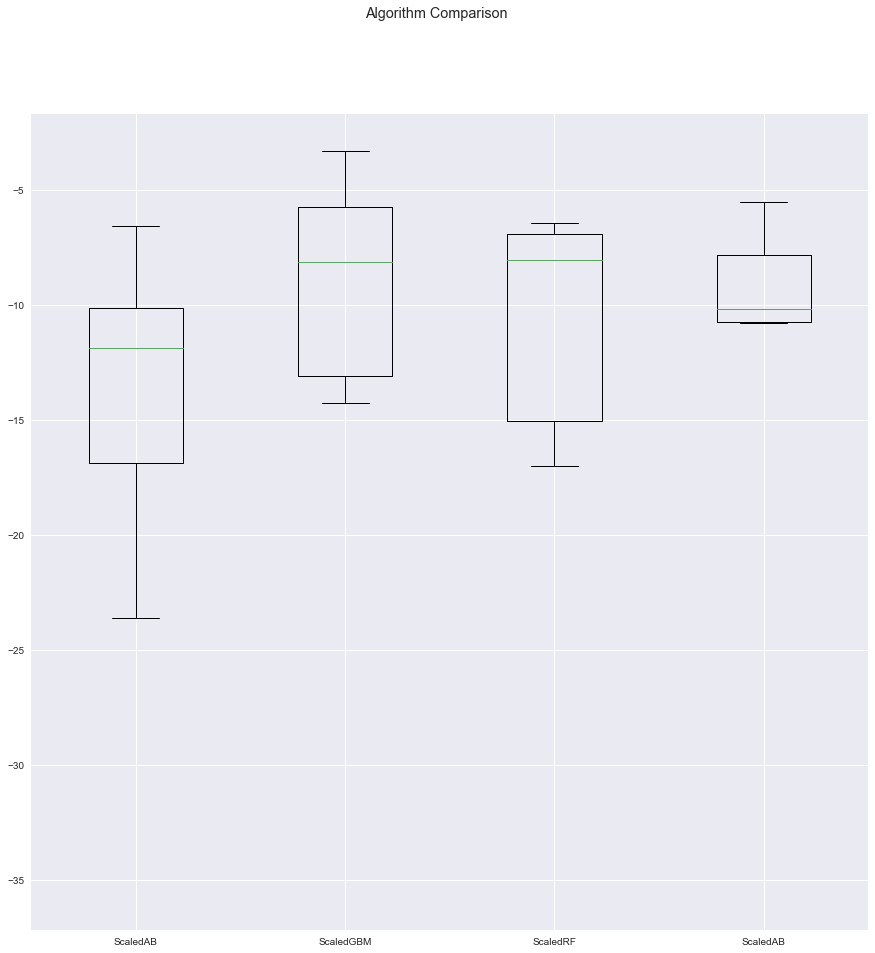

In [53]:
# Compare Algorithms
fig = plt.figure(figsize=(15,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Tuning Ensemble Model

In [57]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits = num_folds, random_state=seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

In [58]:
#Summarize best model
print("Best %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best -11.421084 using {'n_estimators': 150}
-12.548732 (8.692898) with: {'n_estimators': 50}
-11.658134 (8.408017) with: {'n_estimators': 100}
-11.421084 (8.306386) with: {'n_estimators': 150}
-11.424310 (8.318262) with: {'n_estimators': 200}
-11.471678 (8.379133) with: {'n_estimators': 250}
-11.471918 (8.361507) with: {'n_estimators': 300}
-11.473514 (8.266600) with: {'n_estimators': 350}
-11.495090 (8.238851) with: {'n_estimators': 400}


### Finalize Model

In [62]:
#prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [63]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_val)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_val, predictions))

6.79903443055
